In [24]:
import sklearn
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

In [63]:
def area_under_roc_curve(q0, q1):
  '''
  Compute the area under the ROC curve.
  
  arguments
  ---------
  q0 : NumPy array
    The class 0 probabilities returned by the model on the class 0 validation data.
    
  q1 : NumPy array
    The class 0 probabilities returned by the model on the class 1 validation data.
    
  returns
  -------
  float
    Area under the ROC curve.
  '''
  n0 = len(q0)
  q0 = list(zip(q0, [0] * n0))
  n1 = len(q1)
  q1 = list(zip(q1, [1] * n1))
  R = sum([r for r, (p, c) in enumerate(sorted(q0 + q1)) if c == 0])
  auc = (R - ((n0 * (n0 + 1)) / 2)) / (n0 * n1)
  return auc

def plot_roc_curve(q0, q1, auc = False, model_name = None):
  '''
  Plot the ROC curve.
  
  arguments
  ---------
  q0 : NumPy array
    The class 0 probabilities returned by the model on the class 0 validation data.
    
  q1 : NumPy array
    The class 0 probabilities returned by the model on the class 1 validation data.
    
  auc : bool
    If true, label the area under the ROC curve with AUC.
  '''
  partition = np.linspace(0, 1, 1000)
  cdf0 = [c / len(q0) for c in [np.sum((q0 < x)) for x in partition]]
  cdf1 = [c / len(q1) for c in [np.sum((q1 < y)) for y in partition]]
  plt.figure(figsize = (6.67, 5))
  plt.plot(cdf0, cdf1)
  if auc:
    auc = round(area_under_roc_curve(q0, q1), 5)
    plt.fill_between(cdf0, cdf1, color = 'grey', alpha = 0.33)
    plt.text(0.5, 0.5, f'AUC = {auc}', ha = 'center', va = 'center', fontsize = 16)
  plt.xlabel(r'$F(q \mid 0)$')
  plt.ylabel(r'$F(q \mid 1)$')
  plt.title((model_name + ' ' if model_name is not None else '') + 'ROC Curve')
  plt.show()

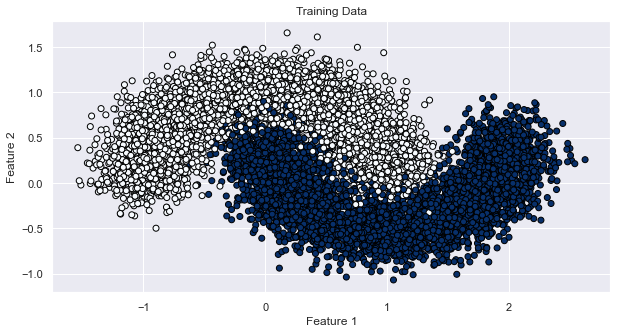

In [55]:
# training and validation data
X_train, y_train = make_moons(10000, noise = 0.2)
X_valid, y_valid = make_moons(10000, noise = 0.2)

# Plot training data
plt.figure(figsize = (10, 5))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, cmap = 'Blues', edgecolor = 'black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')
plt.show()

In [56]:
# fit logistic regression and SVM models
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
rbf_svm = SVC(kernel = 'rbf', probability = True)
rbf_svm.fit(X_train, y_train)

# model probability estimates
q_log_reg = log_reg.predict_proba(X_valid)
q_rbf_svm = rbf_svm.predict_proba(X_valid)

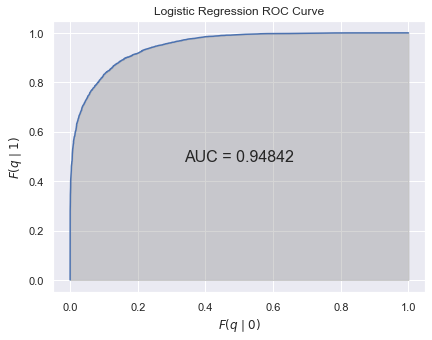

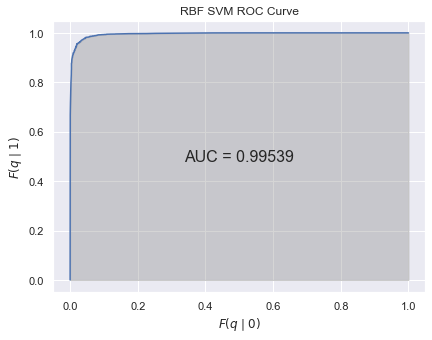

In [65]:
# compare model ROC curves
plot_roc_curve(q_log_reg[y_valid == 0, 0], q_log_reg[y_valid == 1, 0], auc = True, model_name = 'Logistic Regression')
plot_roc_curve(q_rbf_svm[y_valid == 0, 0], q_rbf_svm[y_valid == 1, 0], auc = True, model_name = 'RBF SVM')

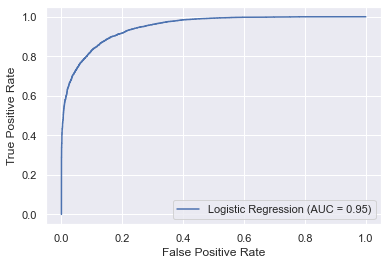

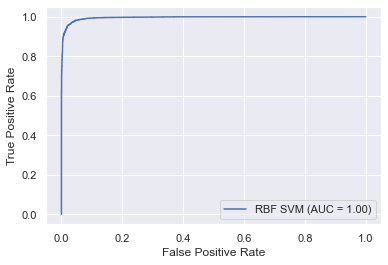

In [62]:
# compare with sklearn implementation
for q, name in [(q_log_reg, 'Logistic Regression'), (q_rbf_svm, 'RBF SVM')]:
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_valid, q[:, 1])
  auc = sklearn.metrics.auc(fpr, tpr)
  sklearn.metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc, estimator_name = name).plot()